## imports

In [1]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt

## methods

In [2]:
def get_data_all(x) -> pd.DataFrame:
    r = requests.get('https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake2/sens/any_sensor_data_entry/',auth=('SENSOR_DATALAKE2', 'smarTclassrooM2Da'), params={"limit":50000, "offset":x * 10_000})

    df = pd.json_normalize(r.json()["items"])

    df.set_index(pd.DatetimeIndex(df["inserttime"]), inplace=True)
    df.drop("inserttime", axis=1, inplace=True)
    df.sort_index(inplace=True)

    return df

def show_data(data:pd.DataFrame):
    x = data.index.values

    device1_hum = data["device1humidity"].values
    device2_hum = data["device2humidity"].values
    device3_hum = data["device3humidity"].values

    device1_co2 = data["device1co2"].values
    device2_co2 = data["device2co2"].values
    device3_co2 = data["device3co2"].values

    device1_temp = data["device1temp"].values
    device2_temp = data["device2temp"].values
    device3_temp = data["device3temp"].values

    device3_window1 = data["device3window1a"].values
    device3_window2 = data["device3window2b"].values
    device3_window3 = data["device3window3a"].values
    device3_window4 = data["device3window4b"].values
    device3_window5 = data["device3window5a"].values

    device1_light = data["device1light"].values
    device2_light = data["device2light"].values
    device3_light = data["device3light"].values

    fig, ax = plt.subplots(5, 1, sharex=True, figsize=(15,15))

    ax[0].set_title("Humidity")
    ax[0].plot(x, device1_hum, label="Device1")
    ax[0].plot(x, device2_hum, label="Device2")
    ax[0].plot(x, device3_hum, label="Device3")
    ax[0].legend(loc="right")
    ax[0].set_ylabel("Humidity in %")

    ax[1].set_title("CO2")
    ax[1].plot(x, device1_co2, label="Device1")
    ax[1].plot(x, device2_co2, label="Device2")
    ax[1].plot(x, device3_co2, label="Device3")
    ax[1].legend(loc="right")
    ax[1].set_ylabel("CO2 in ppM")

    ax[2].set_title("Temperature")
    ax[2].plot(x, device1_temp, label="Device1")
    ax[2].plot(x, device2_temp, label="Device2")
    ax[2].plot(x, device3_temp, label="Device3")
    ax[2].legend(loc="right")
    ax[2].set_ylabel("Temperature in °C")

    ax[3].set_title("Lightstrength")
    ax[3].plot(x, device1_light, label="Device1")
    ax[3].plot(x, device2_light, label="Device2")
    ax[3].plot(x, device3_light, label="Device3")
    ax[3].legend(loc="right")
    ax[3].set_ylabel("Lightstrength in lumen")

    ax[4].set_title("Window")
    ax[4].plot(x, device3_window1, label="Window1")
    ax[4].plot(x, device3_window2, label="Window2")
    ax[4].plot(x, device3_window3, label="Window3")
    ax[4].plot(x, device3_window4, label="Window4")
    ax[4].plot(x, device3_window5, label="Window5")
    ax[4].legend(loc="right")
    ax[4].set_yticks([0, 1])
    ax[4].set_yticklabels(["closed", "open"])
    ax[4].set_ylabel("State [open; closed]")


In [3]:
#Da immer nur 10'000 Zeilen mit einer Abfrage geholt werden können, werden diese in mehrere df gespeichert und danach zusammengeführt.
#In den Klammern immer die Nummer des jeweiligen df angeben (Dann nimmt immer die nächsten Zeilen)
df0 = get_data_all(0)
df1 = get_data_all(1)
df2 = get_data_all(2)
df3 = get_data_all(3)
df4 = get_data_all(4)

#df Zusammenführen
df = pd.concat([df0, df1, df2, df3, df4], axis=0)

#Sicherheitshalber nochmals sortieren
df = df.sort_values(by="inserttime")

#2 Neue Spalten hinzufügen, für Anzahl Personen im Klassenzimmer und Fächer
df = df.assign(numberOfPeople = 0, subject = "Nichts")

In [4]:
#df erwitern anhand Klassenliste (welche von den Lehrern ausgefüllt wurde)
#04.04.2022
mask = (df.index > pd.to_datetime("04042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("04042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 18
df.loc[mask, "subject"] = "Allg."

mask = (df.index > pd.to_datetime("04042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("04042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 16
df.loc[mask, "subject"] = "Allg."

mask = (df.index > pd.to_datetime("04042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("04042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 17
df.loc[mask, "subject"] = "Allg."

mask = (df.index > pd.to_datetime("04042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("04042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 16
df.loc[mask, "subject"] = "Allg."
#05.04.2022
mask = (df.index > pd.to_datetime("05042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 21
df.loc[mask, "subject"] = "Allg."

mask = (df.index > pd.to_datetime("05042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("05042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("05042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 11
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("05042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 11
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("05042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 14:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "Mittag"

mask = (df.index > pd.to_datetime("05042022 14:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("05042022 14:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 19
df.loc[mask, "subject"] = "Französisch"
#06.04.2022
mask = (df.index > pd.to_datetime("06042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 08:20:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 19
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("06042022 10:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 8
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("06042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "Pause"

mask = (df.index > pd.to_datetime("06042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("06042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 11
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("06042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 12:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 2
df.loc[mask, "subject"] = "Mittag"

mask = (df.index > pd.to_datetime("06042022 14:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("06042022 15:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 4
df.loc[mask, "subject"] = "Elterngespräch"
#07.04.2022
mask = (df.index > pd.to_datetime("07042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("07042022 08:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 20
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("07042022 08:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("07042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("07042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("07042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 20
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("07042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("07042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("07042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("07042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 11
df.loc[mask, "subject"] = "Abteilung"
#08.04.2022
mask = (df.index > pd.to_datetime("08042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("08042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Französisch"

mask = (df.index > pd.to_datetime("08042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("08042022 09:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("08042022 09:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("08042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 23
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("08042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("08042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("08042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("08042022 12:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 2
df.loc[mask, "subject"] = "Mittag"
#11.04.2022
mask = (df.index > pd.to_datetime("11042022 12:40:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("11042022 14:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "3 Tageblock"

mask = (df.index > pd.to_datetime("11042022 14:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("11042022 15:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 2
df.loc[mask, "subject"] = "3 Tageblock"

mask = (df.index > pd.to_datetime("11042022 15:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("11042022 18:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "3 Tageblock"
#12.04.2022
mask = (df.index > pd.to_datetime("12042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("12042022 11:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "3 Tageblock"

mask = (df.index > pd.to_datetime("12042022 11:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("12042022 12:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 3
df.loc[mask, "subject"] = "3 Tageblock"
#13.04.2022
mask = (df.index > pd.to_datetime("13042022 12:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("13042022 15:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "3 Tageblock"
#25.04.2022
mask = (df.index > pd.to_datetime("25042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("25042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 19
df.loc[mask, "subject"] = "Allgemein"

mask = (df.index > pd.to_datetime("25042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("25042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 17
df.loc[mask, "subject"] = "Allgemein"

mask = (df.index > pd.to_datetime("25042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("25042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 18
df.loc[mask, "subject"] = "Allgemein"

mask = (df.index > pd.to_datetime("25042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("25042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 17
df.loc[mask, "subject"] = "Allgemein"

mask = (df.index > pd.to_datetime("25042022 12:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("25042022 16:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "Allgemein"
#26.04.2022
mask = (df.index > pd.to_datetime("26042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 09:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 21
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("26042022 09:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 09:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("26042022 10:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 12
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("26042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 11:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 13
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("26042022 11:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 11:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 8
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("26042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("26042022 12:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 2
df.loc[mask, "subject"] = "Vorleseeinheiten"
#27.04.2022
mask = (df.index > pd.to_datetime("27042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("27042022 08:20:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("27042022 10:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("27042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 11
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("27042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("27042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 10
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("27042022 17:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("27042022 17:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 1
df.loc[mask, "subject"] = "Vorleseeinheiten"
#28.04.2022
mask = (df.index > pd.to_datetime("28042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("28042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 13
df.loc[mask, "subject"] = "Abteilung"

mask = (df.index > pd.to_datetime("28042022 08:45:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("28042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Abteilung"
#29.04.2022
mask = (df.index > pd.to_datetime("29042022 08:00:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("28042022 10:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 23
df.loc[mask, "subject"] = "Ganzklass"

mask = (df.index > pd.to_datetime("29042022 11:30:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC")) & \
        (df.index < pd.to_datetime("29042022 12:15:00", format="%d%m%Y %H:%M:%S").tz_localize("UTC"))
df.loc[mask, "numberOfPeople"] = 22
df.loc[mask, "subject"] = "Ganzklass"

,entryid,device1humidity,device1co2,device1temp,device2humidity,device2co2,device2temp,device3humidity,device3co2,device3temp,...,device3window4b,device3window5a,device1light,device2light,device3light,device1battery,device2battery,device3battery,numberOfPeople,subject
inserttime,,,,,,,,,,,,,,,,,,,,,
2022-04-03 16:57:49+00:00,537,28.3035,360.727,22.6394,29.3671,433.828,22.4445,27.2156,464.521,24.6021,...,0.0,0.0,10.57170,9.30525,12.9165,None,None,None,0,Nichts
2022-04-03 16:59:04+00:00,538,28.4836,361.801,22.6688,29.3304,433.614,22.5032,27.1317,462.388,24.6315,...,0.0,0.0,10.38860,8.81055,12.9165,None,None,None,0,Nichts
2022-04-03 17:00:14+00:00,539,28.4225,367.020,22.6955,29.4586,433.403,22.5460,27.1591,462.645,24.6315,...,0.0,0.0,9.96814,8.87486,12.9314,None,None,None,0,Nichts
2022-04-03 17:01:26+00:00,540,28.3279,369.415,22.7382,29.3198,441.238,22.5460,27.2278,464.077,24.6021,...,0.0,0.0,9.59712,8.45932,12.9413,None,None,None,0,Nichts
2022-04-03 17:02:37+00:00,541,28.3096,367.818,22.7249,29.2557,444.417,22.6020,27.2278,466.831,24.6021,...,0.0,0.0,9.25578,8.06851,12.2883,None,None,None,0,Nichts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 14:38:22+00:00,43775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Nichts
2022-05-02 14:39:03+00:00,43776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Nichts
2022-05-02 14:39:45+00:00,43777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Nichts


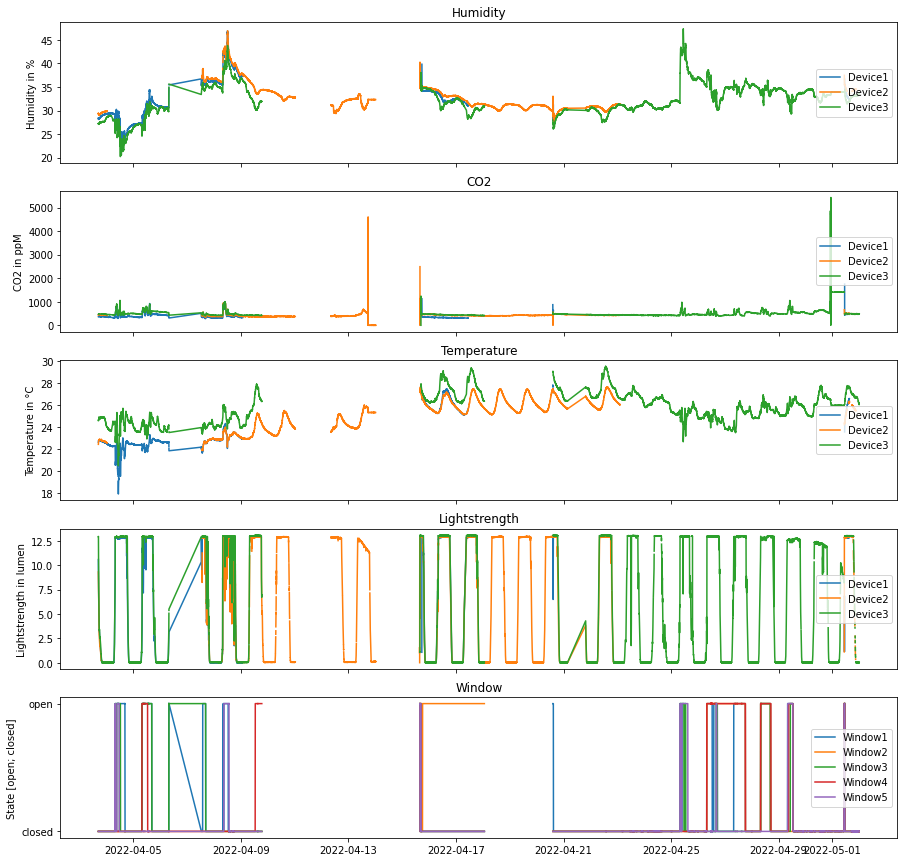

In [5]:
show_data(df)
df